In [2]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("dairy_dataset.csv")
print(data)
#print(data.info())
#does number of cows in a farm has any dependency on area aquired. 


           Location  Total Land Area (acres)  Number of Cows Farm Size   
0         Telangana                   310.84              96    Medium  \
1     Uttar Pradesh                    19.19              44     Large   
2        Tamil Nadu                   581.69              24    Medium   
3         Telangana                   908.00              89     Small   
4       Maharashtra                   861.95              21    Medium   
...             ...                      ...             ...       ...   
4320          Delhi                   748.71              89    Medium   
4321      Jharkhand                   385.91              29     Large   
4322     Chandigarh                   311.54              65     Small   
4323    Maharashtra                   890.55              90     Small   
4324      Rajasthan                   492.86              58     Large   

            Date  Product ID Product Name                 Brand   
0     2022-02-17           5    Ice Cream   

In [15]:
print(data.describe())

       Total Land Area (acres)  Number of Cows   Product ID   
count              4325.000000     4325.000000  4325.000000  \
mean                503.483073       54.963699     5.509595   
std                 285.935061       26.111487     2.842979   
min                  10.170000       10.000000     1.000000   
25%                 252.950000       32.000000     3.000000   
50%                 509.170000       55.000000     6.000000   
75%                 751.250000       77.000000     8.000000   
max                 999.530000      100.000000    10.000000   

       Quantity (liters/kg)  Price per Unit   Total Value  Shelf Life (days)   
count           4325.000000     4325.000000   4325.000000        4325.000000  \
mean             500.652657       54.785938  27357.845411          29.127630   
std              288.975915       26.002815  21621.051594          30.272114   
min                1.170000       10.030000     42.516500           1.000000   
25%              254.170000     

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [3]:
gp = data.groupby("Location").agg({"Number of Cows":"sum","Total Land Area (acres)":"sum"})
print(gp)

                Number of Cows  Total Land Area (acres)
Location                                               
Bihar                    13214                123740.88
Chandigarh               27875                262496.66
Delhi                    29060                267502.01
Gujarat                  14074                131749.37
Haryana                  13463                121921.57
Jharkhand                13130                123127.74
Karnataka                14515                129767.96
Kerala                   13792                128608.08
Madhya Pradesh           14643                135883.88
Maharashtra              14491                124371.52
Rajasthan                14556                124122.54
Tamil Nadu               12862                120402.22
Telangana                13905                122481.88
Uttar Pradesh            15148                144035.27
West Bengal              12990                117352.71


In [4]:
c = np.array(data["Number of Cows"])
l = np.array(data["Total Land Area (acres)"])
print(np.corrcoef(c,l))

[[ 1.        -0.0095939]
 [-0.0095939  1.       ]]


In [ ]:
#sns.barplot(data=data,x ="Number of Cows",y = "Farm Size")
#plt.show()

# shelf:

In [5]:
#number of cows  according to farm size in 3 different farm size

gp = data.groupby("Farm Size").agg({"Number of Cows":"sum"})
print(gp)

           Number of Cows
Farm Size                
Large               81037
Medium              79292
Small               77389


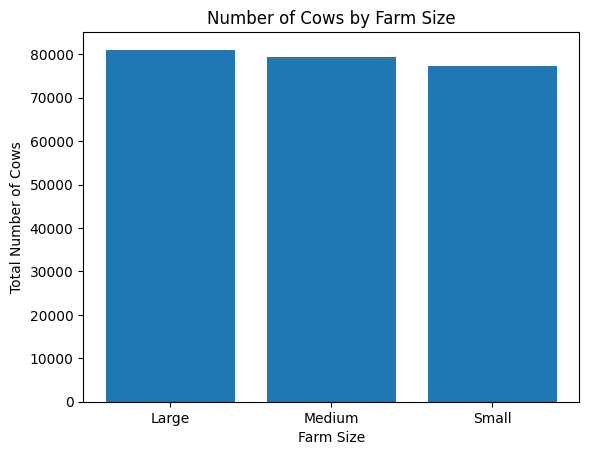

In [6]:
# for better understanding plotting bar graph;
gp = data.groupby("Farm Size").agg({"Number of Cows":"sum"})
plt.bar(gp.index, gp["Number of Cows"])
plt.xlabel("Farm Size")
plt.ylabel("Total Number of Cows")
plt.title("Number of Cows by Farm Size")
plt.show()


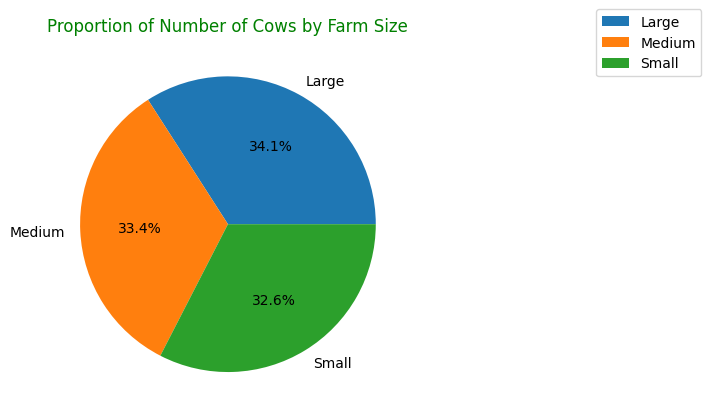

In [7]:
## for better understanding plotting pie chart;

# Assuming you have already performed the grouping and aggregation
gp = data.groupby("Farm Size").agg({"Number of Cows": "sum"})
plt.pie(gp["Number of Cows"], labels=gp.index, autopct='%1.1f%%')
plt.title("Proportion of Number of Cows by Farm Size", color="green")
plt.legend(loc="upper right", bbox_to_anchor=(1.8, 1.1))
plt.show()



# Mention the name of the products with max and min shelf life

In [8]:
maximum_shelf_life = data["Shelf Life (days)"].max()  # Find the maximum shelf life in days
maximum_product = data[data["Shelf Life (days)"] == maximum_shelf_life]["Product Name"].values[0]  # Find the corresponding product name

print("Product Name:", maximum_product)
print("Maximum Shelf Life (days):", maximum_shelf_life)


Product Name: Ghee
Maximum Shelf Life (days): 150


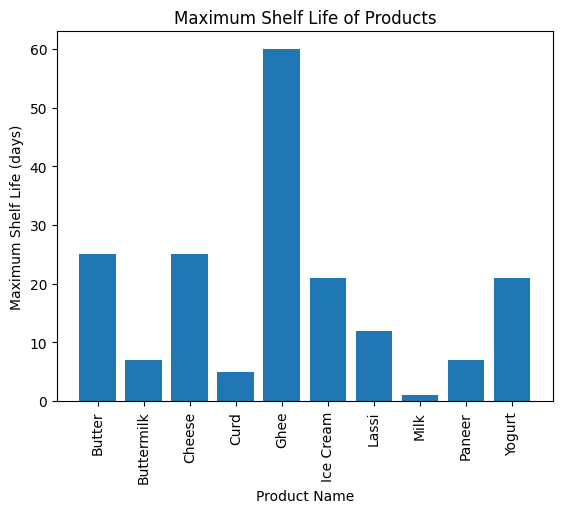

In [40]:

plt.bar(gp.index, gp["Shelf Life (days)"])
plt.xlabel("Product Name")
plt.ylabel("Maximum Shelf Life (days)")
plt.title("Maximum Shelf Life of Products")
plt.xticks(rotation=90)
plt.show()

In [9]:
minimum_shelf_life = data["Shelf Life (days)"].min()  # Find the maximum shelf life in days
minimum_product = data[data["Shelf Life (days)"] == minimum_shelf_life]["Product Name"].values[0]  # Find the corresponding product name

print("Product Name:", minimum_product)
print("Minimum Shelf Life (days):", minimum_shelf_life)

Product Name: Milk
Minimum Shelf Life (days): 1


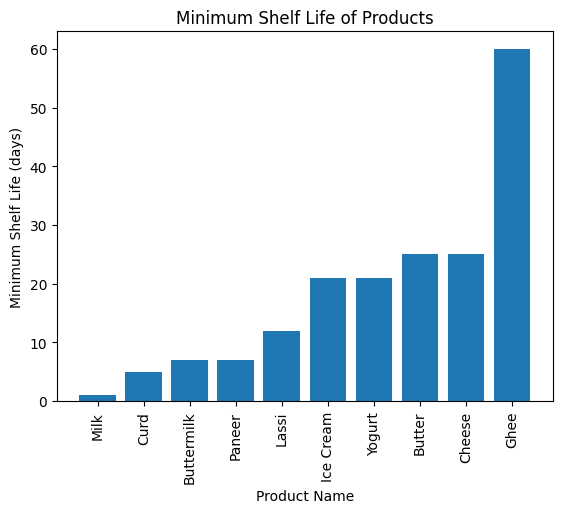

In [43]:

gp = data.groupby("Product Name").agg({"Shelf Life (days)": "min"})
gp = gp.sort_values(by="Shelf Life (days)", ascending=True)
plt.bar(gp.index, gp["Shelf Life (days)"])
plt.xlabel("Product Name")
plt.ylabel("Minimum Shelf Life (days)")
plt.title("Minimum Shelf Life of Products")
plt.xticks(rotation=90)
plt.show()


# summarize the data on the basis of brands and land acquired by them,cows and the revenue generated by them. 

In [10]:
gp = data.groupby("Brand").agg({"Total Land Area (acres)":"count","Approx. Total Revenue(INR)":"sum","Number of Cows":"sum"})
print(gp)

                      Total Land Area (acres)  Approx. Total Revenue(INR)   
Brand                                                                       
Amul                                     1053                 14608864.46  \
Britannia Industries                       88                  1029522.05   
Dodla Dairy                               222                  2604857.37   
Dynamix Dairies                           106                  1479884.78   
Mother Dairy                             1010                 13766786.47   
Palle2patnam                              211                  2528989.12   
Parag Milk Foods                          102                  1516697.71   
Passion Cheese                             96                  1498653.15   
Raj                                       685                  9560777.64   
Sudha                                     648                  8370109.56   
Warana                                    104                  1769505.55   

# Different Brand selling their product(quantity):

In [13]:
gp = data.groupby("Brand").agg({"Number of Cows":"sum","Quantity Sold (liters/kg)":"sum"})
print(gp)

                      Number of Cows  Quantity Sold (liters/kg)
Brand                                                          
Amul                           56873                     264450
Britannia Industries            4968                      21047
Dodla Dairy                    12354                      49667
Dynamix Dairies                 5637                      26772
Mother Dairy                   56517                     251745
Palle2patnam                   11705                      51119
Parag Milk Foods                5204                      26762
Passion Cheese                  5353                      27296
Raj                            36957                     174742
Sudha                          36467                     148917
Warana                          5683                      30494


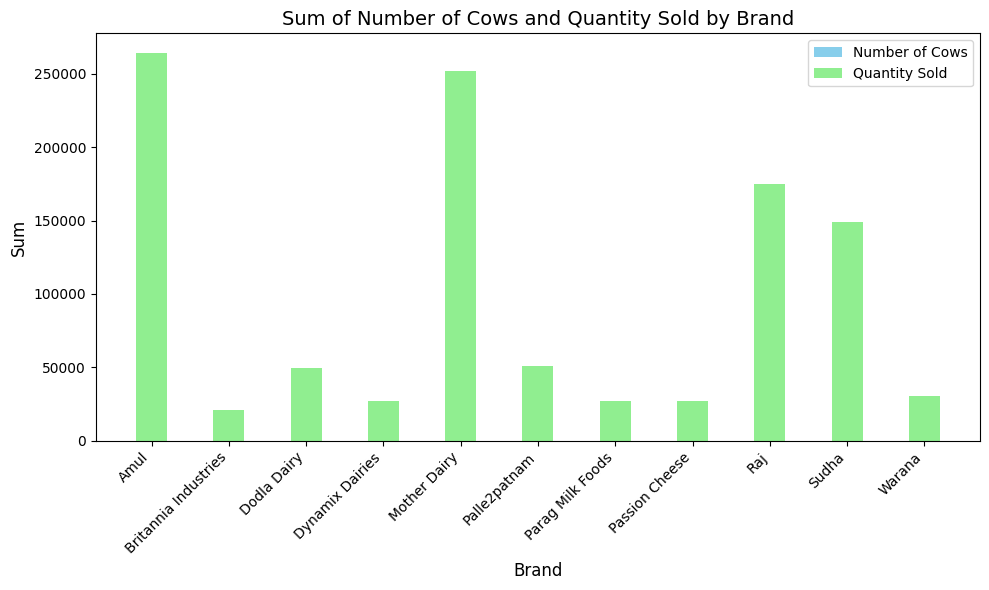

In [14]:
# quantity sold by diffrent brand:
plt.figure(figsize=(10, 6))
x = range(len(gp.index))
plt.bar(x, gp["Number of Cows"], width=0.4, label="Number of Cows", color='skyblue')
plt.bar(x, gp["Quantity Sold (liters/kg)"], width=0.4, label="Quantity Sold", color='lightgreen')
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Sum", fontsize=12)
plt.title("Sum of Number of Cows and Quantity Sold by Brand", fontsize=14)
plt.xticks(x, gp.index, rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


#  The average expiry days of each product

In [27]:
gp=data.groupby("Product Name").agg({"Shelf Life (days)":"mean"})
print(gp)

              Shelf Life (days)
Product Name                   
Butter                32.932715
Buttermilk            10.572414
Cheese                57.324190
Curd                   6.025052
Ghee                 105.741294
Ice Cream             25.458629
Lassi                 14.847875
Milk                  12.923077
Paneer                10.662132
Yogurt                25.517162


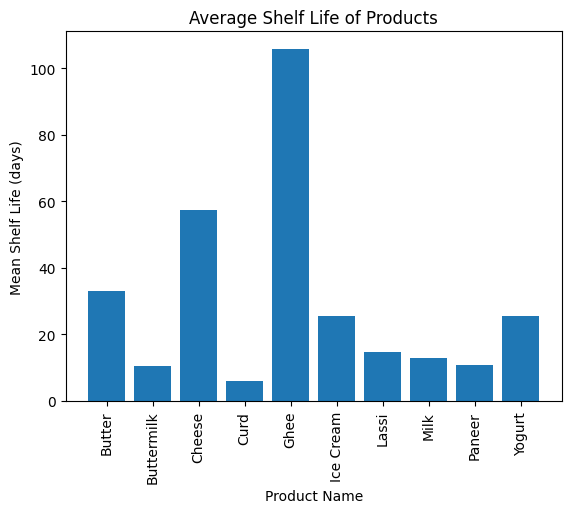

In [28]:
# Average shelf Life of products in days through bar plot
gp = data.groupby("Product Name").agg({"Shelf Life (days)": "mean"})
plt.bar(gp.index, gp["Shelf Life (days)"])
plt.xlabel("Product Name")
plt.ylabel("Mean Shelf Life (days)")
plt.title("Average Shelf Life of Products")
plt.xticks(rotation=90)
plt.show()


# #The average shelf life for different storage conditions. 

In [22]:
gp=data.groupby("Storage Condition").agg({"Shelf Life (days)":"mean"})
print(gp)

                   Shelf Life (days)
Storage Condition                   
Ambient                   105.741294
Frozen                     32.508213
Polythene Packet            1.471111
Refrigerated               18.006913
Tetra Pack                 25.553922


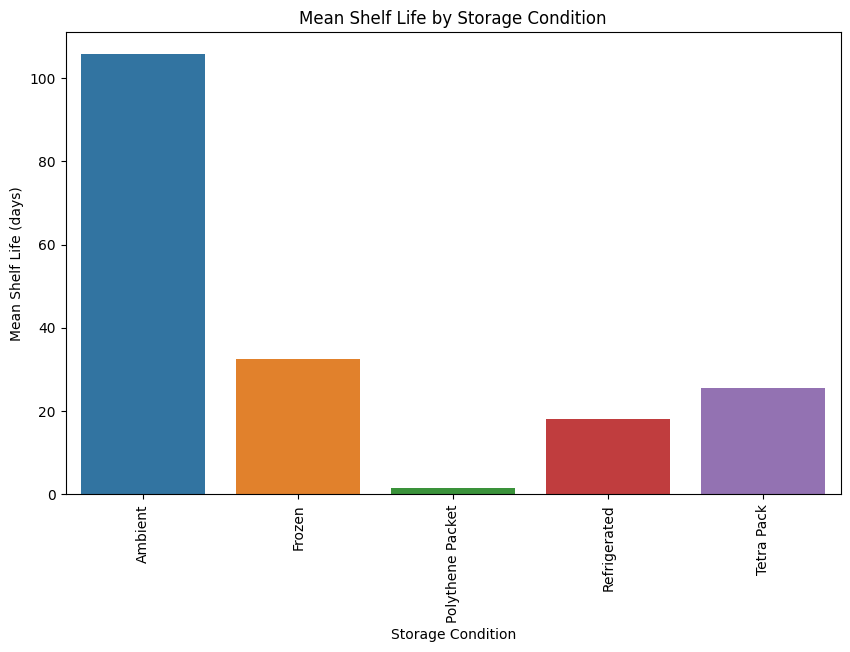

In [23]:
# Average mean shelf Life by storage Condition
plt.figure(figsize=(10, 6))
sns.barplot(x=gp.index, y="Shelf Life (days)", data=gp)
plt.xlabel("Storage Condition")
plt.ylabel("Mean Shelf Life (days)")
plt.title("Mean Shelf Life by Storage Condition")
plt.xticks(rotation=90)
plt.show()


# shelf
# Quantity sold(liters/kg) in diffrent location(state/UT)

In [48]:
gp = data.groupby("Location").agg({"Quantity Sold (liters/kg)":"sum"})
print(gp)

                Quantity Sold (liters/kg)
Location                                 
Bihar                               62395
Chandigarh                         134625
Delhi                              130096
Gujarat                             64057
Haryana                             59828
Jharkhand                           57917
Karnataka                           62037
Kerala                              60231
Madhya Pradesh                      64531
Maharashtra                         66085
Rajasthan                           67102
Tamil Nadu                          61045
Telangana                           61293
Uttar Pradesh                       64015
West Bengal                         57754


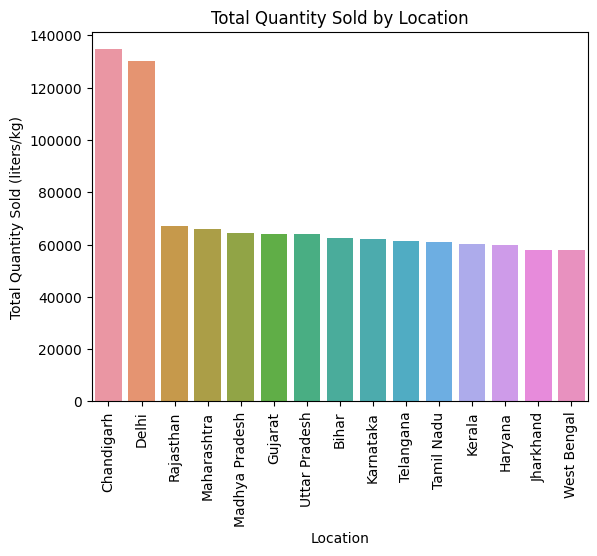

In [49]:

gp = data.groupby("Location").agg({"Quantity Sold (liters/kg)": "sum"})
gp = gp.sort_values(by="Quantity Sold (liters/kg)", ascending=False)
sns.barplot(x=gp.index, y="Quantity Sold (liters/kg)", data=gp)
plt.xlabel("Location")
plt.ylabel("Total Quantity Sold (liters/kg)")
plt.title("Total Quantity Sold by Location")
plt.xticks(rotation=90)
plt.show()
